In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py
import os
import dotenv
project_dir = os.path.join(os.getcwd(), os.pardir)
dotenv_path = os.path.join(project_dir, '.env')
found = dotenv.load_dotenv(dotenv_path)

In [2]:
def plot_loc(loc, index,imgs, craters,fmt="05d"):
    name='img_{}'.format(index)
    fig = plt.figure(figsize=[20, 20])
    [ax1, ax2, ax3] = fig.subplots(1,3)
    ax1.imshow(imgs['input_images'][loc][...], origin='upper', cmap='Greys_r')#, vmin=120, vmax=200)
    ax2.imshow(imgs['target_masks'][loc][...], origin='upper', cmap='Greys_r')
    im = np.dstack([imgs['input_images'][loc][...],imgs['input_images'][loc][...],imgs['input_images'][loc][...]])
    im[...,0][imgs['target_masks'][loc][...]>0.9]=0.
    im[...,1][imgs['target_masks'][loc][...]>0.9]=0.
    im[...,2][imgs['target_masks'][loc][...]>0.9]=255.
    ax3.imshow(im, origin='upper')
    plt.show()
    print("Long Lat Bounds")
    print("\t{}".format(imgs['longlat_bounds'].attrs['definition']))
    print("\t{}".format(imgs['longlat_bounds'][name][...]))
    print("\t{}".format(imgs['pix_bounds'].attrs['definition']))
    print("\t{}".format(imgs['pix_bounds'][name][...]))
    
    print("\tFound {} craters".format(craters[name].size))
    return imgs['pix_bounds'][name][...]


In [3]:
processed_data = os.path.join(os.getenv("DM_ROOTDIR"),"data/processed")
gen_imgs = h5py.File(os.path.join(processed_data, 'ran_images_175000.hdf5'), 'r')
#gen_craters = h5py.File(os.path.join(processed_data, 'train_craters.hdf5'), 'r')
gen_craters = pd.HDFStore(processed_data + '/ran_craters_175000.hdf5', 'r')


Print out the header for the HDF file

In [4]:
print("Images files")
for k in gen_imgs.keys():
    print("{} len({})".format(k,len(gen_imgs[k])))
    for k2,v2 in gen_imgs[k].attrs.items():
        print("\t {}={}".format(k2,v2))

Images files
cll_xy len(95)
	 definition=(x, y) pixel coordinates of the central long / lat.
input_images len(100)
	 definition=Input image dataset.
longlat_bounds len(95)
	 definition=(long min, long max, lat min, lat max) of the cropped image.
pix_bounds len(95)
	 definition=Pixel bounds of the Global DEM region that was cropped for the image.
pix_distortion_coefficient len(95)
	 definition=Distortion coefficient due to projection transformation.
target_masks len(100)
	 definition=Target mask dataset.


For a chosen location (image index) in the file, plot the DEM image, crater image, and overlay craters on the DEM

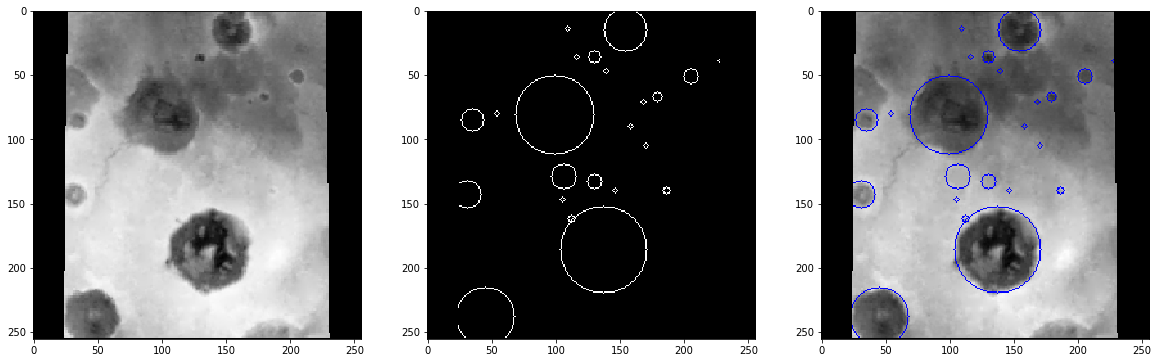

Long Lat Bounds
	(long min, long max, lat min, lat max) of the cropped image.
	[ 7.82461994 10.08529064 36.03407877 38.29474947]
	Pixel bounds of the Global DEM region that was cropped for the image.
	[55666 15324 56336 15994]
	Found 138 craters


In [5]:
loc=48
ll = plot_loc(loc,175000+loc,gen_imgs,gen_craters)

Load the DEM raw data and find the corresponding location bsed on pixel bounds listed in the image

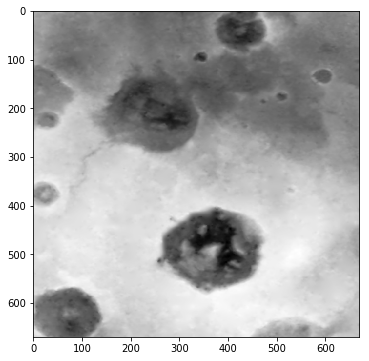

In [6]:
import os
import tifffile
mola = tifffile.imread(os.getenv("DM_MarsDEM"))


x = np.linspace(-180,180,1+mola.shape[1]//256)
y = np.linspace(90,-90,1+mola.shape[0]//256)
plt.figure(figsize=(12,6))
plt.imshow(mola[ll[1]:ll[3],ll[0]:ll[2]],cmap="Greys_r",origin='upper')
plt.show()


In [7]:
gen_imgs.close()
gen_craters.close()